Q1)
Consider the  Table Contains the Average Annual Gold Rate from 1965 – 2022. Gold prices fluctuated throughout the year 2020 because of the COVID-19 epidemic. With gold functioning as a safe haven for investors, demand for the precious metal grew, and its price followed suit. During the epidemic, the stock market weakened, but it began to recover by the end of 2020 when the price of gold fell slightly.
It’s crucial to remember that gold prices fluctuate during the year, and the figure below represents the average price for that year.
With the exception of a few lows shared across a few years, The table shows that the gold price trend has always been upward, supporting the claim that gold is a secure investment over extended periods of time.

Write a python program to find the fitted simple linear regression equation for the given data. 
Compare the coefficients obtained from sklearn model with your program. Compute the error, MSE and RMSE. Predict the gold price with the year 2025 for 1 gram.

In [1]:
#step 1: create the csv file
#step 2: import csv file

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv("C:/Users/Aditi/Documents/Manipal/3rd year/ML/Data/gold_prices.csv")
print(df)

d = df.to_numpy(dtype = int)

    Year  Price(24karatper10grams)
0   1964                        64
1   1965                        72
2   1966                        84
3   1967                       103
4   1968                       162
5   1969                       176
6   1970                       184
7   1971                       193
8   1972                       202
9   1973                       279
10  1974                       506
11  1975                       540
12  1976                       432
13  1977                       486
14  1978                       685
15  1979                       937
16  1980                      1330
17  1981                      1800
18  1982                      1645
19  1983                      1800
20  1984                      1970
21  1985                      2130
22  1986                      2140
23  1987                      2570
24  1988                      3130
25  1989                      3140
26  1990                      3200
27  1991            

In [4]:
"""X = np.array(df['Year'])
Y = np.array(df['Price (24 karat per 10 grams)'])

X.reshape(-1, 1) #one col and as many rows as necessary
Y.reshape(-1, 1)

X.dtype"""

X = d[:,0]
Y = d[:,1]

X.reshape((-1, 1)) #one col and as many rows as necessary
Y.reshape((-1, 1))

print("\nX:\n ",X)
print("\nY:\n ",Y)


X:
  [1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023]

Y:
  [   64    72    84   103   162   176   184   193   202   279   506   540
   432   486   685   937  1330  1800  1645  1800  1970  2130  2140  2570
  3130  3140  3200  3466  4334  4140  4598  4680  5160  4725  4045  4234
  4400  4300  4990  5600  5850  7000 10800 12500 14500 18500 26400 31050
 29600 28007 26344 28624 29668 31438 35220 48651 48720 52670 61080]


In [5]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx #slope
    b_0 = m_y - b_1*m_x #y intercept
 
    return (b_0, b_1)
 

Estimated coefficients:
b_0 = -1415528.2012147112, b_1 = 715.5489428222506


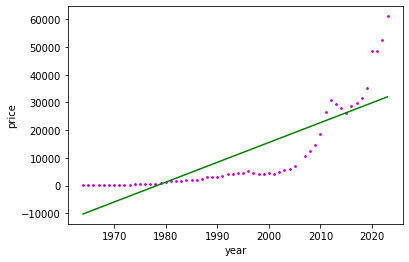

In [6]:
b = estimate_coef(X, Y)
print("Estimated coefficients:\nb_0 = {}, b_1 = {}".format(b[0], b[1]))
 
# plotting regression line
plt.scatter(X, Y, color = "m", s = 3)

y_pred = b[0] + b[1]*X

plt.plot(X, y_pred, color = "g")
plt.xlabel('year')
plt.ylabel('price')
plt.show()

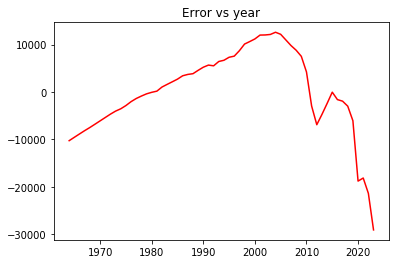

rmse:  8691.827705926153


In [7]:
err = y_pred - Y
plt.plot(X, err, color = 'r')
plt.title('Error vs year')
plt.show()

mse = np.square(np.subtract(Y,y_pred)).mean()
rmse = math.sqrt(mse)
print("rmse: ",rmse)

In [8]:
#gold price estimate for 2025:
est = b[0]+ b[1]*2025 #year = x = 2025
print("Predicted gold price in 2025: ", est)
#for 1 gram
est1 = est/10
print("Predicted gold price in 2025 (1 gram): ", est1)

Predicted gold price in 2025:  33458.40800034627
Predicted gold price in 2025 (1 gram):  3345.840800034627


In [9]:
#sklearn requires dataFrame format
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

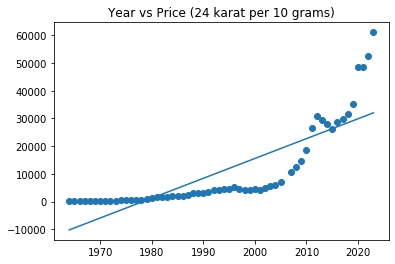

In [10]:
model = LinearRegression(fit_intercept = True)
model.fit(X,Y)

b0 = model.intercept_
b1 = model.coef_

Y_pred = b0 + b1 * X

plt.scatter(X,Y)
plt.plot(X,Y_pred)
plt.title('Year vs Price (24 karat per 10 grams)')
plt.show()

In [11]:
#gold price estimate for 2025:
est2 = b0+ b1*2025 #year = x = 2025
print("Predicted gold price in 2025: ", est2)
#for 1 gram
est3 = est2/10
print("Predicted gold price in 2025 (1 gram): ", est3)

Predicted gold price in 2025:  [33458.40800034]
Predicted gold price in 2025 (1 gram):  [3345.84080003]


In [12]:
print("difference in results: ", est-est2)

difference in results:  [4.42378223e-09]


Q2)
Consider the Question no 1 gold price with following year-wise silver price. Write a python program to find the fitted multiple linear regression equation for the given data.  Compare the coefficients obtained from sklearn model with your program. Compute the error, MSE and RMSE. Predict the gold and silver price with the year 2024 for 1 gram.

In [5]:
#trimming gold price dataset to match silver price
df1 = df[df['Year']>= 1981]
print(df1)

d1 = df1.to_numpy(dtype = float)

    Year  Price(24karatper10grams)
17  1981                      1800
18  1982                      1645
19  1983                      1800
20  1984                      1970
21  1985                      2130
22  1986                      2140
23  1987                      2570
24  1988                      3130
25  1989                      3140
26  1990                      3200
27  1991                      3466
28  1992                      4334
29  1993                      4140
30  1994                      4598
31  1995                      4680
32  1996                      5160
33  1997                      4725
34  1998                      4045
35  1999                      4234
36  2000                      4400
37  2001                      4300
38  2002                      4990
39  2003                      5600
40  2004                      5850
41  2005                      7000
42  2007                     10800
43  2008                     12500
44  2009            

In [6]:
df2 = pd.read_csv("/Users/Aditi/Documents/Manipal/3rd year/ML/Data/silver_prices.csv")
print(df2)

d2 = df2.to_numpy(dtype = float)

    Year  Silver Rates in /Kg.
0   1981                  2715
1   1982                  2720
2   1983                  3105
3   1984                  3570
4   1985                  3955
5   1986                  4015
6   1987                  4794
7   1988                  6066
8   1989                  6755
9   1990                  6463
10  1991                  6646
11  1992                  8040
12  1993                  5489
13  1994                  7124
14  1995                  6335
15  1996                  7346
16  1997                  7345
17  1998                  8560
18  1999                  7615
19  2000                  7900
20  2001                  7215
21  2002                  7875
22  2003                  7695
23  2004                 11770
24  2005                 10675
25  2006                 17405
26  2007                 19520
27  2008                 23625
28  2009                 22165
29  2010                 27255
30  2011                 56900
31  2012

In [7]:
#prices as independent variables
x1= d1[:,1] #price of gold
x2= d2[:,1] #price of silver

#year as dependent variable
y = d1[:,0] 

print(np.size(x1),np.size(x2),np.size(y))

42 42 42


In [17]:
def estimate_coef(x1,x2, y):
    # number of observations/points
    n = np.size(x1)
 
    # mean of vectors
    m_x1 = np.mean(x1)
    m_x2 = np.mean(x2)
    m_y = np.mean(y)
    
    #Summation values
    sum_x1x1 = np.sum(x1*x1)
    sum_x2x2 = np.sum(x2*x2)
    sum_x1y = np.sum(x1*y)
    sum_x2y = np.sum(x2*y)
    sum_x1x2 =  np.sum(x1*x2)
 
    # calculating regression coefficients
    #slope
    b1 = sum_x2x2*sum_x1y - sum_x1x2*sum_x2y / sum_x1x1*sum_x2x2 - sum_x1x2
    b2 = sum_x1x1*sum_x2y - sum_x1x2*sum_x1y / sum_x1x1*sum_x2x2 - sum_x1x2
    #y intercept
    b0 = m_y - b1*m_x1 - b2*m_x2 
 
    return (b0, b1,b2)

Estimated coefficients:
b_0 = 7.794699939903275e+23, b_1 = -2.8907260307974463e+19, b_2 = -1.6974108298595305e+19


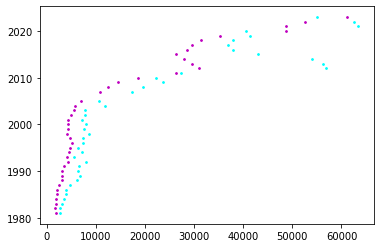

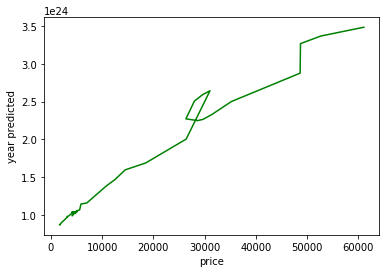

In [18]:
b = estimate_coef(x1,x2,y)
print("Estimated coefficients:\nb_0 = {}, b_1 = {}, b_2 = {}".format(b[0], b[1], b[2]))
 
# plotting regression line
plt.scatter(x1,y, color = "m", s = 3)
plt.scatter(x2,y, color = "cyan", s = 3)
plt.show()

y_pred = b[0] - b[1]*x1 -b[2]*x2

plt.plot(x1, y_pred, color = "g")
plt.xlabel('price')
plt.ylabel('year predicted')
plt.show()

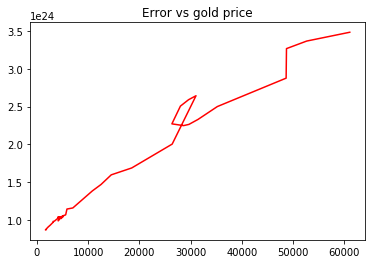

rmse:  1.745740757303439e+24


In [19]:
err = y_pred - y
plt.plot(x1, err, color = 'r')
plt.title('Error vs gold price')
plt.show()

mse = np.square(np.subtract(y,y_pred)).mean()
rmse = math.sqrt(mse)
print("rmse: ",rmse)

In [ ]:
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import linear_model

In [26]:
X = [df1['Price(24karatper10grams)'],df2['Silver Rates in /Kg.']]
Y = y

print(X)

[17     1800
18     1645
19     1800
20     1970
21     2130
22     2140
23     2570
24     3130
25     3140
26     3200
27     3466
28     4334
29     4140
30     4598
31     4680
32     5160
33     4725
34     4045
35     4234
36     4400
37     4300
38     4990
39     5600
40     5850
41     7000
42    10800
43    12500
44    14500
45    18500
46    26400
47    31050
48    29600
49    28007
50    26344
51    28624
52    29668
53    31438
54    35220
55    48651
56    48720
57    52670
58    61080
Name: Price(24karatper10grams), dtype: int64, 0      2715
1      2720
2      3105
3      3570
4      3955
5      4015
6      4794
7      6066
8      6755
9      6463
10     6646
11     8040
12     5489
13     7124
14     6335
15     7346
16     7345
17     8560
18     7615
19     7900
20     7215
21     7875
22     7695
23    11770
24    10675
25    17405
26    19520
27    23625
28    22165
29    27255
30    56900
31    56290
32    54030
33    43070
34    37825
35    36990
36    37825
37   

In [12]:
#doing at home
x1 = x1.reshape(-1, 1)
x2 = x2.reshape(-1, 1)

print(x1)
print(x2.T)

X = np.hstack((x1, x2))
Y = y

print(X)

[[ 1800.]
 [ 1645.]
 [ 1800.]
 [ 1970.]
 [ 2130.]
 [ 2140.]
 [ 2570.]
 [ 3130.]
 [ 3140.]
 [ 3200.]
 [ 3466.]
 [ 4334.]
 [ 4140.]
 [ 4598.]
 [ 4680.]
 [ 5160.]
 [ 4725.]
 [ 4045.]
 [ 4234.]
 [ 4400.]
 [ 4300.]
 [ 4990.]
 [ 5600.]
 [ 5850.]
 [ 7000.]
 [10800.]
 [12500.]
 [14500.]
 [18500.]
 [26400.]
 [31050.]
 [29600.]
 [28007.]
 [26344.]
 [28624.]
 [29668.]
 [31438.]
 [35220.]
 [48651.]
 [48720.]
 [52670.]
 [61080.]]
[[ 2715.  2720.  3105.  3570.  3955.  4015.  4794.  6066.  6755.  6463.
   6646.  8040.  5489.  7124.  6335.  7346.  7345.  8560.  7615.  7900.
   7215.  7875.  7695. 11770. 10675. 17405. 19520. 23625. 22165. 27255.
  56900. 56290. 54030. 43070. 37825. 36990. 37825. 41400. 40600. 63435.
  62572. 55100.]]
[[ 1800.  2715.]
 [ 1645.  2720.]
 [ 1800.  3105.]
 [ 1970.  3570.]
 [ 2130.  3955.]
 [ 2140.  4015.]
 [ 2570.  4794.]
 [ 3130.  6066.]
 [ 3140.  6755.]
 [ 3200.  6463.]
 [ 3466.  6646.]
 [ 4334.  8040.]
 [ 4140.  5489.]
 [ 4598.  7124.]
 [ 4680.  6335.]
 [ 5160.  7346.]
 

In [13]:
reg=LinearRegression()     #initiating linearregression
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)